# Assignment 1

Due by 11:59pm Sept. 18, 2023

## Theory Questions (Question 1: 9 points, Question 2: 4 points, Question 3: 12 points)

***

1.Suppose `I` is a 5$\times$5 image, `K` is a 3$\times$3 convolving kernel. Compute the convolution of the image `I` with `K`, with the given settings.

`I`:
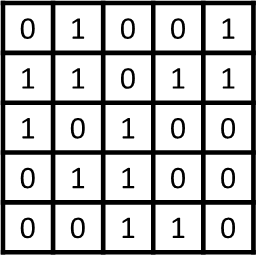

`K`:
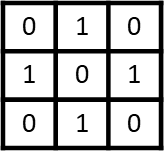

a) Zero padding, stride $=1$.

b) Zero padding, stride $=2$.

c) No padding, stride $=1$.

$$
\begin{bmatrix}
2 & 1 & 1 & 2 & 1 \\
2 & 2 & 3 & 1 & 2 \\
1 & 4 & 1 & 2 & 1 \\
2 & 1 & 3 & 2 & 0 \\
0 & 2 & 2 & 1 & 1 
\end{bmatrix}
$$

**Answer:**
a) [[2,1,1,2,1], [2,2,3,1,2], [1,4,1,2,1], [2,1,3,2,0], [0,2,2,1,1]]
$$
\begin{bmatrix}
2 & 1 & 1 & 2 & 1 \\
2 & 2 & 3 & 1 & 2 \\
1 & 4 & 1 & 2 & 1 \\
2 & 1 & 3 & 2 & 0 \\
0 & 2 & 2 & 1 & 1 
\end{bmatrix}
$$
b) [[2,1,1], [1,1,1], [0,2,1]]
$$
\begin{bmatrix}
2 & 1 & 1 \\
1 & 1 & 1 \\
0 & 2 & 1
\end{bmatrix}
$$
c) [[2,3,1], [4,1,2], [1,3,2]]
$$
\begin{bmatrix}
2 & 3 & 1 \\
4 & 1 & 1 \\
1 & 3 & 2
\end{bmatrix}
$$

2.Let `I` be the input. Write the output using average pooling with $2\times2$ kernel, stride $=2$.

`I`:
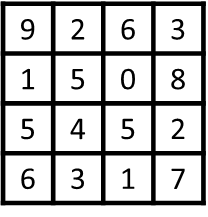

**Answer:**
[[4.25,4.25], [4.25,3.75]]->Rounded Up [[5,5], [5,4]]
Actual: 
$$
\begin{bmatrix}
4.25 & 4.25 \\
4.25 & 3.75
\end{bmatrix}
$$
Rounded:
$$
\begin{bmatrix}
5 & 5 \\
5 & 4
\end{bmatrix}
$$

3.`I` is a $5\times5$ RGB image. `K` is a $3\times3$ convolving kernel with all its weights equal to $-1$. `b` is the bias equal to $1$.

The `R` channel is given as
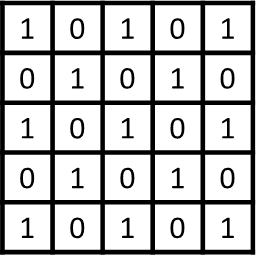

The `G` channel is given as
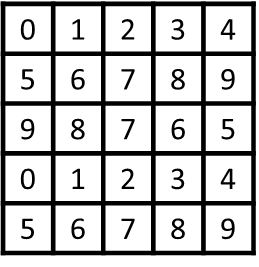

The `B` channel is given as
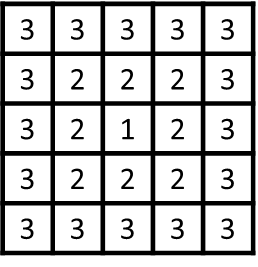

Please calculate the convolution of `I` with `K` and `b`, where stride $=1$, and no padding is applied.

**Answer:** [[-71,-71,-77], [-68,-69,-74], [-71,-71,-77]] 
$$
\begin{bmatrix}
-71 & -71 & -77 \\
-68 & -69 & -74 \\
-71 & -71 & -77
\end{bmatrix}
$$

## Programming Questions (Question 4: 45 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set. 

Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs. 

Print the testing accuracy.

**Note:** Initial code has been provided to import the necessary packages and load the dataset. Now that we have introduced PyTorch programming, you should use it to solve the programming problems in this assignment.

Importing Packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models

Loading Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
train_loader = torch.utils.data.DataLoader(dataset = training_data,
                                           batch_size = 64,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = testing_data,
                                           batch_size = 64,
                                           shuffle = True)

Building CNN

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)  # Reshape for fully connected layer
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
net = Net()

Training CNN

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
epochs = 10
train_losses = []
validation_losses = []
train_accuracy = []
validation_accuracy = []

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy.append(100 * correct_train / total_train)

    # Validation
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    validation_losses.append(running_val_loss / len(test_loader))
    validation_accuracy.append(100 * correct_val / total_val)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Validation Loss: {validation_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracy[-1]:.2f}%, "
          f"Validation Accuracy: {validation_accuracy[-1]:.2f}%")

Epoch 1/10, Train Loss: 0.9330, Validation Loss: 0.2601, Train Accuracy: 76.69%, Validation Accuracy: 92.37%
Epoch 2/10, Train Loss: 0.2056, Validation Loss: 0.1451, Train Accuracy: 93.89%, Validation Accuracy: 95.89%
Epoch 3/10, Train Loss: 0.1335, Validation Loss: 0.1015, Train Accuracy: 96.07%, Validation Accuracy: 96.89%
Epoch 4/10, Train Loss: 0.1044, Validation Loss: 0.0808, Train Accuracy: 96.90%, Validation Accuracy: 97.62%
Epoch 5/10, Train Loss: 0.0875, Validation Loss: 0.0713, Train Accuracy: 97.37%, Validation Accuracy: 97.78%
Epoch 6/10, Train Loss: 0.0760, Validation Loss: 0.0604, Train Accuracy: 97.73%, Validation Accuracy: 98.09%
Epoch 7/10, Train Loss: 0.0677, Validation Loss: 0.0565, Train Accuracy: 97.98%, Validation Accuracy: 98.25%
Epoch 8/10, Train Loss: 0.0617, Validation Loss: 0.0552, Train Accuracy: 98.13%, Validation Accuracy: 98.17%
Epoch 9/10, Train Loss: 0.0563, Validation Loss: 0.0466, Train Accuracy: 98.33%, Validation Accuracy: 98.47%
Epoch 10/10, Train 

Training Loss and Validation Loss

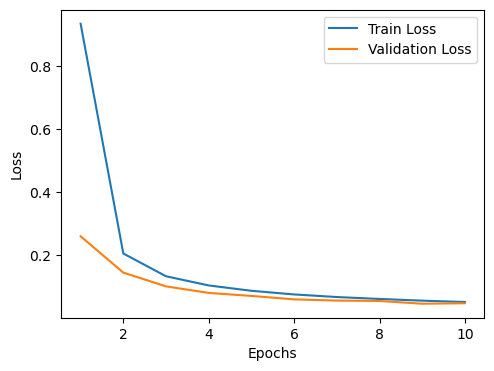

In [6]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label = 'Train Loss')
plt.plot(range(1, epochs + 1), validation_losses, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Training Accuracy and Validation Accuracy

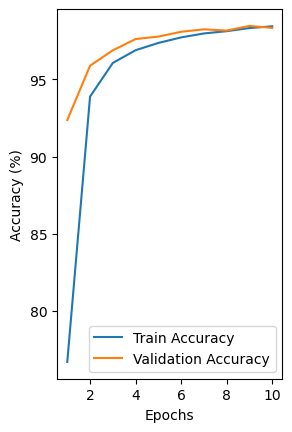

In [7]:
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracy, label = 'Train Accuracy')
plt.plot(range(1, epochs + 1), validation_accuracy, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

Accuracy

In [8]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the test images: {100 * correct / total}%")

Accuracy on the test images: 98.34%


5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images. 

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy. 



In [9]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
training_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
trainloader = torch.utils.data.DataLoader(training_data, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 64, shuffle = False)


Building CNN

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
net = Net()

Training CNN

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")

Epoch 1/20, Loss: 1.4948
Epoch 2/20, Loss: 1.1475
Epoch 3/20, Loss: 1.0065
Epoch 4/20, Loss: 0.9180
Epoch 5/20, Loss: 0.8572
Epoch 6/20, Loss: 0.8096
Epoch 7/20, Loss: 0.7757
Epoch 8/20, Loss: 0.7417
Epoch 9/20, Loss: 0.7210
Epoch 10/20, Loss: 0.6959
Epoch 11/20, Loss: 0.6756
Epoch 12/20, Loss: 0.6605
Epoch 13/20, Loss: 0.6449
Epoch 14/20, Loss: 0.6254
Epoch 15/20, Loss: 0.6124
Epoch 16/20, Loss: 0.6058
Epoch 17/20, Loss: 0.5857
Epoch 18/20, Loss: 0.5785
Epoch 19/20, Loss: 0.5700
Epoch 20/20, Loss: 0.5671


Accuracy

In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test images: {accuracy:.2f}%")

Accuracy on the test images: 76.28%


Tuning Hyper Parameter

In [14]:
trainloader = torch.utils.data.DataLoader(training_data, batch_size = 128, shuffle = True)
testloader = torch.utils.data.DataLoader(test_data, batch_size = 128, shuffle = False)

In [15]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network
net = Net()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

epochs = 20
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}")



Epoch 1/20, Loss: 1.5007
Epoch 2/20, Loss: 1.1445
Epoch 3/20, Loss: 0.9965
Epoch 4/20, Loss: 0.9028
Epoch 5/20, Loss: 0.8368
Epoch 6/20, Loss: 0.7812
Epoch 7/20, Loss: 0.7436
Epoch 8/20, Loss: 0.7106
Epoch 9/20, Loss: 0.6809
Epoch 10/20, Loss: 0.6571
Epoch 11/20, Loss: 0.6319
Epoch 12/20, Loss: 0.6052
Epoch 13/20, Loss: 0.5872
Epoch 14/20, Loss: 0.5713
Epoch 15/20, Loss: 0.5542
Epoch 16/20, Loss: 0.5371
Epoch 17/20, Loss: 0.5309
Epoch 18/20, Loss: 0.5127
Epoch 19/20, Loss: 0.5028
Epoch 20/20, Loss: 0.4925


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test images: {accuracy:.2f}%")

Accuracy on the test images: 78.00%
